In [141]:
import tensorflow as tf
import xlrd
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [18]:
def read_dataset(path_file):
    dataframe = pd.read_excel(path_file, usecols=[i for i in range(1, 32)])
    return dataframe

def normal_function(row):
    max_in_rows = row.max()
    min_in_rows = row.min()
    for i, item in enumerate(row):
        if max_in_rows == min_in_rows:
            row[i] = 0
        else:
            row[i] = (row[i] - min_in_rows) / (max_in_rows - min_in_rows)
    return row 

In [19]:
root_file = os.path.abspath('')
folder_data_result = "result_output_features_merge_1"
folder_path_data_result = os.path.join(root_file, folder_data_result)
list_data_result = [os.path.abspath(os.path.join(folder_data_result, data)) for data in sorted(os.listdir(folder_path_data_result))]
list_data_result

['/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_0.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_10.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_12.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_2.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_4.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_6.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_featrures_8.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_picker_1_2_4_7_ALL.xlsx',
 '/Users/thaihoc/Downloads/VJP/result_output_features_merge_1/output_picker_8_5_6_ALL.xlsx']

In [20]:
# TRAIN
df_extract_feature = read_dataset(list_data_result[7])
df_extract_feature_notNan = df_extract_feature[df_extract_feature[30] > 0]
labels_picker = df_extract_feature_notNan.iloc[:, 30]
labels_picker = pd.DataFrame(labels_picker)
labels_picker.columns = ['labels']
data_picker = df_extract_feature_notNan.iloc[:, :30]
# normalization 
df_extracted_feature = data_picker.apply(normal_function, axis=1)
df_extracted_feature[30] = labels_picker.labels - 1

In [133]:
# TEST
df_extract_feature_test = read_dataset(list_data_result[8])
df_extract_feature_test_notname = df_extract_feature_test[df_extract_feature_test[30] > 0]
labels_picker_test = df_extract_feature_test_notname.iloc[:, 30]
labels_picker_test = pd.DataFrame(labels_picker_test)
labels_picker_test.columns = ['labels']
data_picker_test = df_extract_feature_test_notname.iloc[:, :30]
# normalization 
df_extracted_feature_test = data_picker_test.apply(normal_function, axis=1)
labels_picker_test = labels_picker_test - 1
# df_extracted_feature_test[30] = labels_picker_test.labels - 1

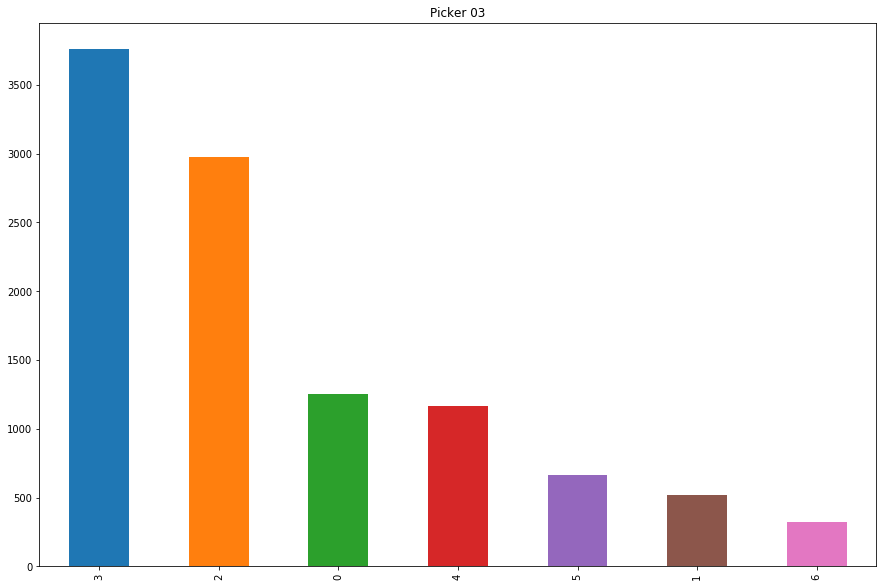

In [22]:
df_extracted_feature[30].value_counts().plot(kind='bar', title='Picker 03', figsize=(15, 10),align='center')

In [51]:
# tu do thi minh se chon thang 6
number_records_fraud = len(df_extracted_feature[df_extracted_feature[30] == 6]) # so luong example
fraud_indices = np.array(df_extracted_feature[df_extracted_feature[30] == 6].index) # vi tri xuat hien

In [52]:
normal_indices_0 = df_extracted_feature[df_extracted_feature[30] == 0].index
normal_indices_1 = df_extracted_feature[df_extracted_feature[30] == 1].index
normal_indices_2 = df_extracted_feature[df_extracted_feature[30] == 2].index
normal_indices_3 = df_extracted_feature[df_extracted_feature[30] == 3].index
normal_indices_4 = df_extracted_feature[df_extracted_feature[30] == 4].index
normal_indices_5 = df_extracted_feature[df_extracted_feature[30] == 5].index

In [53]:
random_normal_indices_0 = np.random.choice(normal_indices_0, number_records_fraud, replace = False)
random_normal_indices_0 = np.array(random_normal_indices_0)

random_normal_indices_1 = np.random.choice(normal_indices_1, number_records_fraud, replace = False)
random_normal_indices_1 = np.array(random_normal_indices_1)

random_normal_indices_2 = np.random.choice(normal_indices_2, number_records_fraud, replace = False)
random_normal_indices_2 = np.array(random_normal_indices_2)

random_normal_indices_3 = np.random.choice(normal_indices_3, number_records_fraud, replace = False)
random_normal_indices_3 = np.array(random_normal_indices_3)

random_normal_indices_4 = np.random.choice(normal_indices_4, number_records_fraud, replace = False)
random_normal_indices_4 = np.array(random_normal_indices_4)

random_normal_indices_5 = np.random.choice(normal_indices_5, number_records_fraud, replace = False)
random_normal_indices_5 = np.array(random_normal_indices_5)

In [54]:
random_normal_indices_0

array([ 6316, 10936,  2768,  5178,  5207,  6400,  7917,  5429,  9712,
        2961,  2479,  7673,  5156,  9292,  8305, 10246,  7973,  3344,
        7969,  1238,  2637,  1896,   628,  5377,  6843,  4360,  7573,
        5338,  5020,  6986,  6551,  4141,  2618,    16, 10487,  9351,
        3596,  3233,  5996,  7821,  3985,  1099,  6617,  9693,  1883,
        3055,  8806,  9578, 10699,  5540, 10493,  4196, 10219,  1033,
        4896,  4947,   293,  1585,  5115,  9080,  7858,  7103,  4923,
        1340,  2599,  1268,  8151,  6732,  5950,  1022,  8837,  8937,
        6378,  1130,  2836,  1465,  1986,  8396,  1909,  2610,  9046,
        7419,  4170, 10456,  4940,  2794,  4720, 10596,  6868,  4915,
        3094,  3265,  4380,  3481,  1894,  1119,  7914, 10974,  8755,
        4135,  3027, 10059,  7508,  4332,  5592,  7354,  6767,  3625,
        9376,  3321,  2806,  3519,  2997, 10162,  8872,  9856,  9435,
        5387,  6731,  5787,  9134,  5276,  3585,  3686,   417,  2353,
         189,  3779,

In [77]:
under_sample_indices = np.concatenate([fraud_indices,
                                       random_normal_indices_0,
                                       random_normal_indices_1,
                                       random_normal_indices_2,
                                       random_normal_indices_3,
                                       random_normal_indices_4,
                                       random_normal_indices_5])

In [78]:
under_sample_data = df_extracted_feature.loc[under_sample_indices,:]

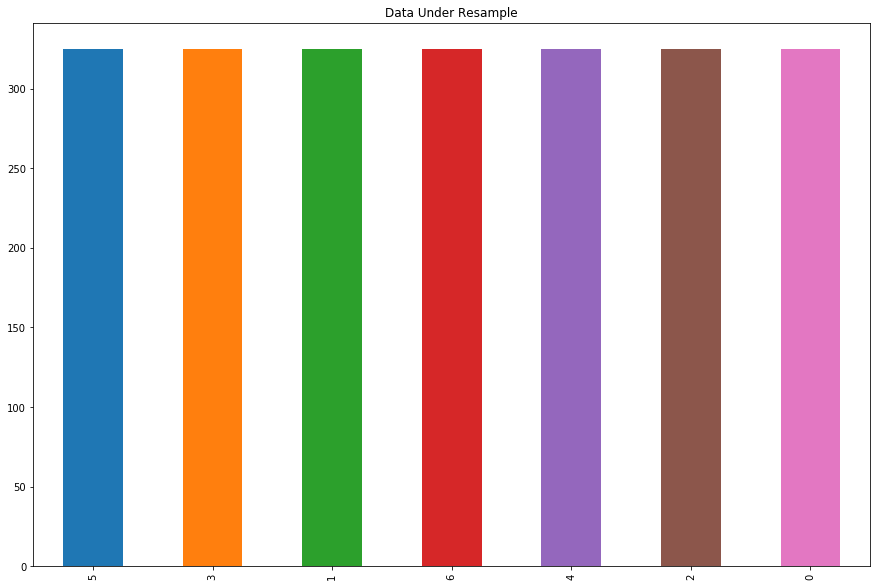

In [89]:
under_sample_data[30].value_counts().plot(kind='bar', title='Data Under Resample', figsize=(15, 10),align='center')

In [81]:
X_undersample = under_sample_data.ix[:, under_sample_data.columns != 30]
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 30]

/Users/thaihoc/Desktop/test/virtual_enviroment_ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/thaihoc/Desktop/test/virtual_enviroment_ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [85]:
# Showing ratio
print("Percentage of normal transactions _ 0: ", len(under_sample_data[under_sample_data[30] == 0])/len(under_sample_data))
print("Percentage of normal transactions _ 1: ", len(under_sample_data[under_sample_data[30] == 1])/len(under_sample_data))
print("Percentage of normal transactions _ 2: ", len(under_sample_data[under_sample_data[30] == 2])/len(under_sample_data))
print("Percentage of normal transactions _ 3: ", len(under_sample_data[under_sample_data[30] == 3])/len(under_sample_data))
print("Percentage of normal transactions _ 4: ", len(under_sample_data[under_sample_data[30] == 4])/len(under_sample_data))
print("Percentage of normal transactions _ 5: ", len(under_sample_data[under_sample_data[30] == 5])/len(under_sample_data))
print("Percentage of fraud transactions  _ 6: ", len(under_sample_data[under_sample_data[30] == 6])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions _ 0:  0.14285714285714285
Percentage of normal transactions _ 1:  0.14285714285714285
Percentage of normal transactions _ 2:  0.14285714285714285
Percentage of normal transactions _ 3:  0.14285714285714285
Percentage of normal transactions _ 4:  0.14285714285714285
Percentage of normal transactions _ 5:  0.14285714285714285
Percentage of fraud transactions  _ 6:  0.14285714285714285
Total number of transactions in resampled data:  2275


In [86]:
X_undersample.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
60,0.977988,0.978362,0.978218,1.000000,0.978784,0.978066,0.978396,0.978771,0.978550,0.993038,...,0.978657,0.984828,0.978464,0.978066,0.768228,0.666500,0.973822,0.000000,0.720078,0.743769
104,0.588501,0.590295,0.588896,0.812519,0.591874,0.589069,0.588716,0.590156,0.589432,0.675694,...,0.590001,0.610344,0.589933,0.589069,0.205828,0.000000,0.364609,0.617179,0.576643,0.579658
116,0.962498,0.962858,0.962676,0.972531,0.962942,0.962470,0.962547,0.963244,0.962886,1.000000,...,0.963037,0.988473,0.963229,0.962470,0.873157,0.485517,0.939821,0.000000,0.770331,0.669796
132,0.985674,0.985801,0.985736,0.988316,0.985808,0.985624,0.985706,0.985997,0.985829,1.000000,...,0.985940,0.994342,0.985957,0.985624,0.953649,0.658830,0.808568,0.434742,0.922379,0.000000
133,0.982321,0.982547,0.982401,0.989714,0.982686,0.982467,0.982355,0.982644,0.982543,1.000000,...,0.982641,0.987179,0.982643,0.982467,0.858991,0.955690,0.280323,0.720349,0.751103,0.000000


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [138]:
from sklearn.svm import SVC


# SVM
svm = SVC(gamma='auto')
svm.fit(X_undersample, y_undersample)

# Note: We should test on the original skewed test set
predictions_svm = svm.predict(df_extracted_feature_test)

# Compute confusion matrix
cnf_matrix_svm = confusion_matrix(labels_picker_test,predictions_svm)

/Users/thaihoc/Desktop/test/virtual_enviroment_ml/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Confusion matrix for validation set')

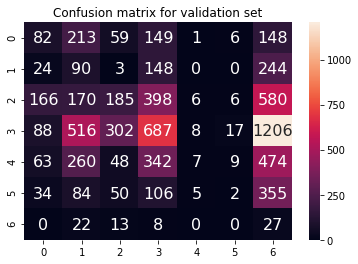

In [142]:
conf = pd.DataFrame(cnf_matrix_svm, range(7),range(7))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 16})
plt.title('Confusion matrix for validation set')